# 教師なし学習

### Q1. 類似度（1/2）（ユークリッド距離とコサイン類似度）
下2次元のユークリッド空間上に，13個のデータ点が図のように分布している状況を考える（各点の座標については，下記コードのリスト``data``に収められている）．

N次元空間上の任意の点$v_1$，$v_2$が与えられたとき，$v_1$と$v_2$のユークリッド距離を求める関数``calc_euclidean_dist(v1, v2)``，コサイン類似度を求める関数``calc_cosine_sim(v1, v2)``を実装せよ．さらに，下図の13つの点のすべての組み合わせについて，そのユークリッド距離とコサイン類似度を求めよ．

なお，実装する関数の第1引数および第2引数は，実数のリストを想定せよ．

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

import random
import numpy as np
from typing import List
from collections import defaultdict

sns.set()
sns.set_style('ticks')
%matplotlib inline

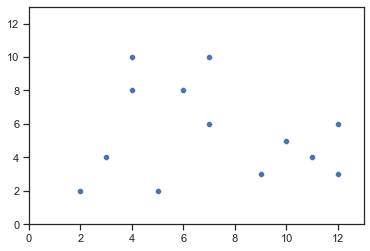

In [2]:
data = [(2, 2), (3, 4), (5, 2), (10, 5), (9, 3),
        (11, 4), (12, 3), (12, 6), (4, 10), (4, 8),
        (6, 8), (7, 10), (7, 6)]

xs, ys = zip(*data) # zipの逆操作

# 可視化
ax = sns.scatterplot(x=xs, y=ys)
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
plt.show()

In [3]:
xs, ys = zip(*data)
print(xs)
print(ys)


(2, 3, 5, 10, 9, 11, 12, 12, 4, 4, 6, 7, 7)
(2, 4, 2, 5, 3, 4, 3, 6, 10, 8, 8, 10, 6)


In [275]:
# ユークリッド距離
def calc_euclidean_dist(v1, v2) -> float:
    dist_list = []
    for xs, ys in zip(v1, v2):
        dist_list.append((xs - ys) ** 2)
    else:
        dist = np.sqrt(np.sum(dist_list))
    
    return dist

# コサイン類似度
def calc_cosine_sim(v1: List, v2: List) -> float:
    xy = []
    x2 = []
    y2 = []

    for xs, ys in zip(v1, v2):
        xy.append((xs * ys))
        x2.append(xs ** 2)
        y2.append(ys ** 2)
    else:
        sim = np.sum(xy) / (np.sqrt(np.sum(x2)) * np.sqrt(np.sum(y2)))
    return sim

In [276]:
euclidean_dists = {}
cosine_sims = {}

for i in range(len(data)):
    for j in range(i, len(data)):
        if i != j:
            euclidean_dists[(i, j)] = calc_euclidean_dist(data[i], data[j])
            cosine_sims[(i, j)] = calc_cosine_sim(data[i], data[j])

In [277]:
print("Euclidean distance:")
euclidean_dists

Euclidean distance:


{(0, 1): 2.23606797749979,
 (0, 2): 3.0,
 (0, 3): 8.54400374531753,
 (0, 4): 7.0710678118654755,
 (0, 5): 9.219544457292887,
 (0, 6): 10.04987562112089,
 (0, 7): 10.770329614269007,
 (0, 8): 8.246211251235321,
 (0, 9): 6.324555320336759,
 (0, 10): 7.211102550927978,
 (0, 11): 9.433981132056603,
 (0, 12): 6.4031242374328485,
 (1, 2): 2.8284271247461903,
 (1, 3): 7.0710678118654755,
 (1, 4): 6.082762530298219,
 (1, 5): 8.0,
 (1, 6): 9.055385138137417,
 (1, 7): 9.219544457292887,
 (1, 8): 6.082762530298219,
 (1, 9): 4.123105625617661,
 (1, 10): 5.0,
 (1, 11): 7.211102550927978,
 (1, 12): 4.47213595499958,
 (2, 3): 5.830951894845301,
 (2, 4): 4.123105625617661,
 (2, 5): 6.324555320336759,
 (2, 6): 7.0710678118654755,
 (2, 7): 8.06225774829855,
 (2, 8): 8.06225774829855,
 (2, 9): 6.082762530298219,
 (2, 10): 6.082762530298219,
 (2, 11): 8.246211251235321,
 (2, 12): 4.47213595499958,
 (3, 4): 2.23606797749979,
 (3, 5): 1.4142135623730951,
 (3, 6): 2.8284271247461903,
 (3, 7): 2.2360679774997

In [278]:
print("Cosine similarity")
cosine_sims

Cosine similarity


{(0, 1): 0.9899494936611665,
 (0, 2): 0.9191450300180578,
 (0, 3): 0.9486832980505138,
 (0, 4): 0.8944271909999159,
 (0, 5): 0.9061831399952652,
 (0, 6): 0.8574929257125442,
 (0, 7): 0.9486832980505137,
 (0, 8): 0.9191450300180578,
 (0, 9): 0.9486832980505138,
 (0, 10): 0.9899494936611665,
 (0, 11): 0.9847835588179369,
 (0, 12): 0.9970544855015815,
 (1, 2): 0.8541985556144386,
 (1, 3): 0.8944271909999159,
 (1, 4): 0.8221921916437785,
 (1, 5): 0.8372705045624257,
 (1, 6): 0.7761140001162656,
 (1, 7): 0.8944271909999157,
 (1, 8): 0.9656157585206697,
 (1, 9): 0.9838699100999074,
 (1, 10): 1.0,
 (1, 11): 0.9994629430332294,
 (1, 12): 0.9761870601839528,
 (2, 3): 0.9965457582448797,
 (2, 4): 0.9982743731749959,
 (2, 5): 0.9994964752953674,
 (2, 6): 0.9908301680442991,
 (2, 7): 0.9965457582448797,
 (2, 8): 0.6896551724137931,
 (2, 9): 0.7474093186836597,
 (2, 10): 0.8541985556144386,
 (2, 11): 0.8367015168942039,
 (2, 12): 0.9466499060501441,
 (3, 4): 0.9899494936611665,
 (3, 5): 0.993408935

### Q2. 類似度（2/2）（類似度の解釈）
Q1で扱ったデータ集合において，点$v=(11, 4)$との最も類似する点（最近傍点）を求めたい．ユークリッド空間の各次元の意味，最近傍点の定義が下記のような設定である場合，点の類似性を評価する関数としてユークリッド距離，コサイン類似度のどちらを用いるのが適切か考察しながら，最近傍点を求めよ．

1. 各点は都市の位置情報を表しており，第1次元は「緯度」，第2次元は「経度」を意味する．最近傍点として，**物理的距離が近い都市**を見つけたいケース．
2. 各点はユーザの購買傾向を表しており，第1次元は「ジャンルAに属する商品を購入した回数」，第2次元は「ジャンルBに属する商品を購入した回数」を意味する．最近傍点として，**購買傾向が似ているユーザ**を見つけたいケース．

### ユークリッド距離 と コサイン類似度

- ユークリッド距離

    ベクトル間の距離を算出する．２点が直線的にどれだけ離れているのかを表す．

- コサイン類似度

    ２点間の角度を算出する．コサイン類似度は -1 から +1 の範囲をとり，+1 に近いほど類似度が高いことを意味する．一般的にベクトル間の数値的な大きさを考慮しない場合に使用する．

#### レコメンドシステムでコサイン類似度が使われるのか？
コサイン類似度は要素の絶対値を無視する．よって，ユーザが購入したコンテンツ自体の類似度で２点間をカテゴライズできる．逆にユークリッド距離の場合，ユーザの利用頻度自体でカテゴライズする．

In [279]:
#1. 物理的距離
dist_dict = {}
for i in data:

    dist_dict[i] = calc_euclidean_dist((11, 4), i)

#dist_dict
sorted(dist_dict.items(), key=lambda x:x[1])[1]

((10, 5), 1.4142135623730951)

In [280]:
#1. 物理的距離
dist_dict = {}
for i in data:

    dist_dict[i] = calc_euclidean_dist((11, 4), i)


print(sorted(dist_dict.items(), key=lambda x:x[1])[-1])
sorted(dist_dict.items(), key=lambda x:x[1])

((4, 10), 9.219544457292887)


[((11, 4), 0.0),
 ((10, 5), 1.4142135623730951),
 ((12, 3), 1.4142135623730951),
 ((9, 3), 2.23606797749979),
 ((12, 6), 2.23606797749979),
 ((7, 6), 4.47213595499958),
 ((5, 2), 6.324555320336759),
 ((6, 8), 6.4031242374328485),
 ((7, 10), 7.211102550927978),
 ((3, 4), 8.0),
 ((4, 8), 8.06225774829855),
 ((2, 2), 9.219544457292887),
 ((4, 10), 9.219544457292887)]

In [281]:
#2. 購買傾向
sim_dict = {}
for i in data:

    sim_dict[i] = calc_cosine_sim((11, 4), i)

print(sorted(sim_dict.items(), key=lambda x:x[1])[1])
sorted(sim_dict.items(), key=lambda x:x[1])

((4, 8), 0.7259526839058266)


[((4, 10), 0.666330983530245),
 ((4, 8), 0.7259526839058266),
 ((7, 10), 0.8189029657474978),
 ((3, 4), 0.8372705045624257),
 ((6, 8), 0.8372705045624257),
 ((2, 2), 0.9061831399952652),
 ((7, 6), 0.9359477990383271),
 ((10, 5), 0.993408935871131),
 ((12, 6), 0.993408935871131),
 ((12, 3), 0.9946184088907779),
 ((5, 2), 0.9994964752953674),
 ((9, 3), 0.9996349698728535),
 ((11, 4), 1.0)]

### Q3. K-means（1/3）（実装）
Q1で扱った13個のデータ点について，[K-means法](https://ja.wikipedia.org/wiki/K%E5%B9%B3%E5%9D%87%E6%B3%95)を用いて3つのクラスタに分割したい．

K-means法は，N個のデータ集合$D=\{x_1, x_2, ..., x_n\}$が与えられたとき，以下の手順でデータ集合をK個のクラスタに分割する：
1. データ集合からランダムにK個のデータを選択し，それぞれをクラスタ中心（centroid）とする．
2. データ集合$D$中の各データ$d \in D$について，K個のクラスタ中心との距離を比較し，最も距離が小さいクラスタにデータ$d$を割り当てる．
3. 各クラスタに属するデータの重心（平均）をクラスタ中心として更新する．
4. 各クラスタに割り当てられるデータが変化しなくなるまで，2と3の処理を繰り返す．

上記手順に従ってK-means法を実装し，対象データを3つのクラスタに分割せよ．

なお，この課題では``sklearn``ライブラリ等のクラスタリングメソッドを用いないこと．また，データ間の距離の計算にはユークリッド距離を用いよ．

In [282]:
# 引数 data -> , k -> クラスタ数(default=3), max_iter -> イテレーション最大数
# 戻り値 dict(cluster_num : data)

def k_means(data, k:int, initial_centroids=[], max_iter=500) -> dict:
    # ランダムに重心の初期値を初期化
    if initial_centroids:
        centroids = initial_centroids
    else:
        centroids  =  random.sample(data, k)

    # 前の重心と比較するために、仮に新しい重心を入れておく配列
    new_centroids = [0.0] * k

    # ループ上限回数まで繰り返し
    for epoch in range(max_iter):
        # 各データ所属クラスタ情報を保存する配列
        cluster = defaultdict(list)
        for i in range(len(data)):
            dist_dict = {}
            for j in range(k):
                dist = calc_euclidean_dist(data[i], centroids[j])
                dist_dict[centroids[j]] =  dist
            x = sorted(dist_dict.items(), key=lambda x:x[1])[0]
    
            # データの所属クラスタを距離の一番近い重心を持つものに更新
            cluster[x[0]].append(data[i])

        
        new_centroids = [0.0] * k
        for i in range(k):
            a, b = [], []
            for j in range(len(cluster[centroids[i]])):
                x,y = cluster[centroids[i]][j]
                a.append(x)
                b.append(y)
            new_centroids[i] = (round(np.mean(a), 1), round(np.mean(b), 1))

        # 重心が変わっていなかったら終了
        if sorted(new_centroids) == sorted(centroids):
            break
            print('break')
        
        centroids =  new_centroids

    return dict(cluster)

In [283]:
k_means(data, k=3)

{(3.3, 2.7): [(2, 2), (3, 4), (5, 2)],
 (10.8, 4.2): [(10, 5), (9, 3), (11, 4), (12, 3), (12, 6)],
 (5.6, 8.4): [(4, 10), (4, 8), (6, 8), (7, 10), (7, 6)]}

### Q4. K-means（2/3）（初期値）
Q4で実装したK-means法は，クラスタ中心の初期値をランダムに割り当てているため，初期値によってはクラスタリングの結果が大きく変わってしまうことがある．この問題を回避するために，様々なアプローチが提案されている．KKZ法はクラスタ中心の初期化手法の1つであり，「最も距離が離れているデータ同士を初期値クラスタ中心を選択する」というものである．KKZ法の具体的な手順は以下の通りである：

1. 与えられたデータ集合$D$からデータ同士の距離が最大となる2つのデータを選択する．それら2つを初期のクラスタ中心$c1$，$c2$とする．
2. 初期のクラスタ中心として選ばれていない各データについて，既に選ばれている各クラスタ中心との距離を計算し，その最小値を保存しておく．
3. ステップ2で計算した値が最大となるデータ$d$を初期のクラスタ中心として追加する．
4. 初期のクラスタ中心がK個（クラスタ分割数）になるまで，ステップ2および3を繰り返す．

KKZ法によって初期クラスタ中心を選択する関数``find_initial_centroids``を実装し，Q4で実装したK-means法を改良せよ．

In [382]:
def find_initial_centroids(data, k:int, max_iter=100) -> list:
    # step1
    euclidean_dists = {}

    for i in range(len(data)):
        for j in range(i, len(data)):
            if i != j:
                euclidean_dists[(i, j)] = calc_euclidean_dist(data[i], data[j])
    
    c1 = sorted(euclidean_dists.items(), key=lambda x:x[1], reverse=True)[0][0][0]
    c2 = sorted(euclidean_dists.items(), key=lambda x:x[1], reverse=True)[0][0][1]
    
    # 重心の初期値
    centroids = [data[c1], data[c2]]
    #print(centroids)

    while len(centroids) < k:
        add_dict = {}
        #print(centroids)
        for i in data:
            dist_dict = {}
            if i in centroids:
                continue
            for j in centroids:
                dist = calc_euclidean_dist(i, j)
                dist_dict[(i, j)] =  dist
            
            #print(sorted(dist_dict.items(), key=lambda x:x[1], reverse=True))
            x = sorted(dist_dict.items(), key=lambda x:x[1])[0]
            #print(x)
            add_dict[x[0][0]] = x[1]

        #print(add_dict)

        # step3    
        centroids.append(sorted(add_dict.items(), key=lambda x:x[1], reverse=True)[0][0])

    return centroids

In [384]:
initial_centroids = find_initial_centroids(data, k=4)
k_means(data, 4, initial_centroids)

{(3.3, 2.7): [(2, 2), (3, 4), (5, 2)],
 (10.8, 4.2): [(10, 5), (9, 3), (11, 4), (12, 3), (12, 6)],
 (5.2, 9.0): [(4, 10), (4, 8), (6, 8), (7, 10)],
 (7.0, 6.0): [(7, 6)]}

### Q5. K-means（3/3）（クラスタ数の決定）
クラスタリングによってデータを分割し，データ集合が性質もつ考察するためには，クラスタが細かくなりすぎないかつある程度意味をなすクラスタのサイズにデータを分割する必要がある．ところで，K-means法は分割後のクラスタ数を指定する必要があるが，現実的にはクラスタリング時に最適なクラスタ数が分かっていることは稀である．このため，最適なクラスタ数を求める様々な方法が提案されている．

クラスタ数をある数に指定したときに，その条件でのクラスタリング結果の質を評価する指標として，クラスタ内のデータとクラスタ中心との距離の差（残差）の平方和（SSE: Sum of Squared errors of prediction）を用いることがある．クラスタ数がk，$C_i$ i番目のクラスタ，$x \in C_i$はクラスタ$C_i$に含まれるデータ，$c_i$はクラスタ$C_i$の重心（平均値）とするとき，SSEは以下の式で定義される：

$$
SSE = \sum^k_i \sum_{x \in C_i} |x - c_i|^2
$$

最適クラスタ数を決定する方法の1つに，クラスタ数を変化させながらSSEを計算し，SSEの値の変化パターンが大きく変わった際のクラスタ数を最適クラスタ数とするものがある．このアプローチを用いて，Q1で用いたデータをK-means法でクラスタリングする場合の最適クラスタ数を求めよ．

In [385]:
def calc_sse(clustered:dict):
    SSE = []
    for k, v in clustered.items():
        dist_list = []
        for i in range(len(v)):
            dist = calc_euclidean_dist(k, v[i])
            dist_list.append(dist ** 2)
        SSE.append(np.sum(dist_list))
    return np.sum(SSE)

In [386]:
SSEs = []
for k in range(2, len(data)):
    initial_centroids = find_initial_centroids(k=k, data=data)
    result = k_means(data, k=k, initial_centroids=initial_centroids)
    sse = calc_sse(result) 
    SSEs.append(sse)
    print("(K = {}) SSE = {}".format(k, sse))

(K = 2) SSE = 112.63999999999999
(K = 3) SSE = 41.339999999999996
(K = 4) SSE = 31.699999999999996
(K = 5) SSE = 26.27
(K = 6) SSE = 21.430000000000003
(K = 7) SSE = 17.17
(K = 8) SSE = 10.5
(K = 9) SSE = 8.0
(K = 10) SSE = 5.5
(K = 11) SSE = 3.0
(K = 12) SSE = 1.0000000000000002


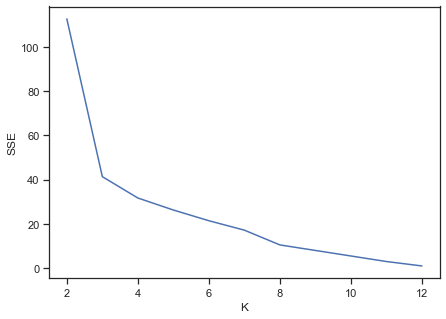

In [392]:
plt.figure(figsize=(7, 5))
ax = sns.lineplot(x=[i+2 for i in range(len(SSEs))], y=SSEs)
ax.set_xlabel('K')
ax.set_ylabel('SSE')
plt.show()

### Q6. 階層的クラスタリング
Q1で扱った13個のデータ点について，[階層的クラスタリング法](http://www.kamishima.net/jp/clustering/)を用いて段階的にクラスタに分割したい．

``scipy.cluster.hierarchy``ライブラリの``linkage``関数および``dendrogram``関数を用いて，Q1で扱ったデータに階層的クラスタリングを適用せよ．その際，階層的クラスタリングのクラスタ生成手法として下記3つの方法を用いて，クラスタの生成過程を結果を比較せよ：

* セントロイド法（centroid）
* 最短距離法（single linkage）
* 最長距離法（complete linkage）

なお，クラスタ間の距離の尺度にはユークリッド距離を用いること．

### Q7. Instacartユーザの注文頻度情報の集計と整形
Q7-Q10では，[「SQL & 探索的データ解析」](/eda.ipynb)の演習で扱ったInstacartのデータを用いる．

Instacart利用ユーザの特徴を把握するために，以下の手順で分析を行いたい．
1. ユーザ毎の商品の注文頻度を集計したデータを準備する
2. 1で準備したデータをクラスタリングする
3. クラスタ毎に注文頻度の高い商品を分析し，注文傾向を考察する

事前準備として，Instacartのデータベースに対してSQL文を発行し，ユーザ毎に商品棚（aisle）別注文数を集計せよ．さらに得られた結果を
* 行がユーザ
* 列が商品棚別注文数

に対応する``pandas``データフレームに格納せよ．なお，注文がない商品棚については注文数をゼロとすること．

### Q8. 主成分分析による次元圧縮（1/2）
Q7で準備したデータは206,209のユーザの134の商品棚に関する注文回数情報を保持しているが，属性数（商品棚数）も多いためデータの解釈が容易ではない．そこで，データ群の特徴を保持しながらデータを低次元空間に縮約したい（少ない変数で表現したい）．

Q7で得られたデータに**主成分分析**を適用し，データを5次元に圧縮せよ．また，圧縮したデータを2つの主成分ベクトルが張る平面へ射影（例：第1主成分と第2主成分のみを取り出し）し，データの分布を散布図で可視化せよ．

### Q9. 主成分分析による次元圧縮（2/2）
Q8で行った主成分分析の結果得られた第1主成分ベクトルから第5主成分ベクトルについて，その寄与率を表示せよ．また，各主成分ベクトルを構成する要素の大きさ（絶対値）順に上位20個の商品棚（aisle）を表示し，各主成分ベクトルが表す意味を考察せよ．

### Q10. 次元圧縮結果を用いたクラスタリング
Q9で圧縮したデータとK-means法を用いて，ユーザを5つのクラスタに分割せよ．さらに，各クラスタに属するユーザの商品棚注文数の平均値を計算し，各クラスタのユーザの特性について考察せよ．なお，この課題において第1主成分は「総合的な注文数を表す成分」と考えられるため，クラスタリングの際には第1主成分を無視せよ．

* ヒント1：本課題では``sklearn``ライブラリの``cluster.KMeans``クラスを用いよ（計算速度が速い）
* ヒント2：クラスタの初期設定は``cluster.KMeans``クラスのデフォルト設定（K-means++）に頼ればよい